# **DATA SCIENTIST TECHNICAL TEST - UPSCALE.ID**
**HELMI M RIZAL**

# **Project - Building a Customer Segmentation Model**

## **1. Preprocessing, Cleaning, Exploratory Data Analysis (EDA)**

### **Installing Libraries**

In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### **Working with Dataset**

In [ ]:
# Accessing the dataset
df = pd.read_csv('/Mall_Customers.csv')

In [ ]:
# Take a glimpse into the dataset (top 10 data)
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
# shape of the dataset (rows and columns)
df.shape

(200, 5)

In [ ]:
# brief information of the dataset (column names, data type, null data if any)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# brief descriptive statistics of the dataset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,2.585000
std,57.879185,13.969007,26.264721,25.823522,1.228953
min,1.000000,18.000000,15.000000,1.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000,2.000000
50%,100.500000,36.000000,61.500000,50.000000,2.000000
75%,150.250000,49.000000,78.000000,73.000000,3.000000
max,200.000000,70.000000,137.000000,99.000000,5.000000


In [ ]:
# checking missing values
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# create new dataframe consists of annual income and spending score that is going to be clustered
X = df.iloc[:, [3,4]].values

In [ ]:
# checking newly created dataframe
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## **2. K-Means Clustering**

### **Determine the optimal number of clusters using Elbow method**

Iterate over different values (1 to 11) of k (number of clusters) with KMeans++ initializer, fit the K-Means clustering algorithm, and calculate the inertia (within-cluster sum of squares) for each value of k



In [ ]:
inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

### **Plot the Elbow Curve**

Visualize inertia values, spot where the inflection point is, and that is the optimal number of clusters 

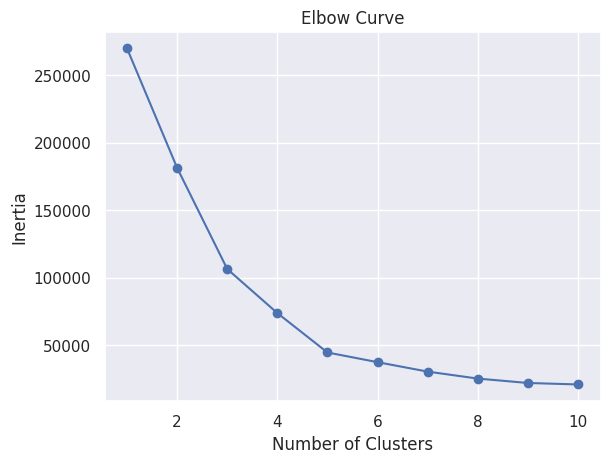

In [ ]:
sns.set()
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

We can see that the plot reduces drastically from k = 1 to k = 3, then slows down from k = 3 to k = 5, and then flattens until k = 10. So, we can see the elbow at k = 5. Therefore, we can identify that 5 is the optimal number of clusters

### **Fitting K-Means Clustering with the selected optimal number of clusters to the dataset**

In [ ]:
# Initialize K-Means Model with selected optimal number of clusters
kmeansmodel = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeansmodel.fit_predict(X)

# Assigning cluster labels to each customer
labels = kmeansmodel.labels_

# Adding the cluster labels to the dataset
df['Cluster'] = labels + 1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# show the dataset that has been clustered
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,5
1,2,Male,21,15,81,4
2,3,Female,20,16,6,5
3,4,Female,23,16,77,4
4,5,Female,31,17,40,5
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,1


## **3. Visualizations**

### **Clusters Visualization**

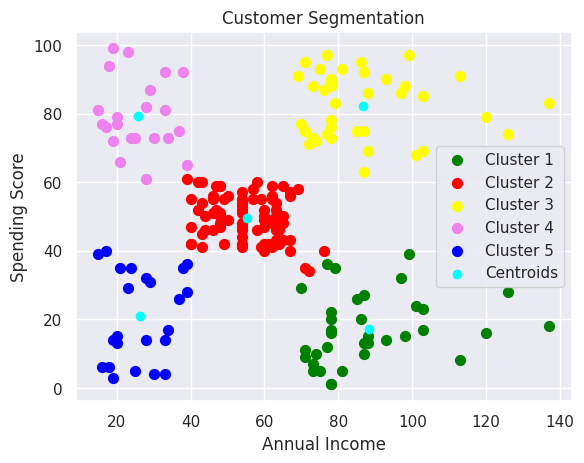

In [ ]:
# visualize the clusters
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')
plt.scatter(kmeansmodel.cluster_centers_[:,0], kmeansmodel.cluster_centers_[:,1], c='cyan', label='Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation')
plt.legend()
plt.show()

### **Characteristic of each clusters (Annual Income vs Spending Score)**

In [ ]:
# Analyzing the characteristics of each cluster
cluster_characteristics = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].groupby('Cluster').mean()
cluster_characteristics

,Annual Income (k$),Spending Score (1-100)
Cluster,,
1,88.200000,17.114286
2,55.296296,49.518519
3,86.538462,82.128205
4,25.727273,79.363636
5,26.304348,20.913043


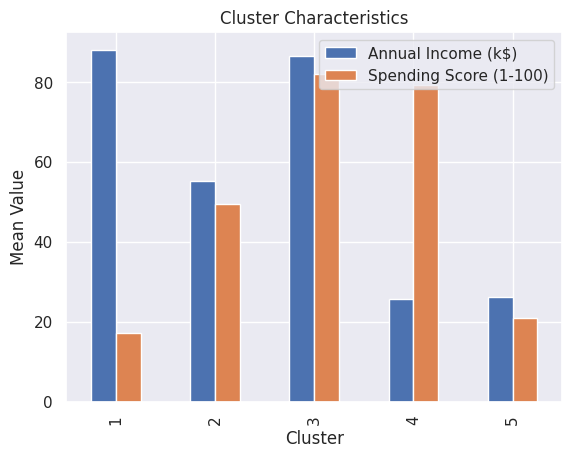

In [ ]:
# Visualizing cluster characteristics using bar plots
cluster_characteristics.plot(kind='bar', stacked=False)
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.title('Cluster Characteristics')
plt.legend(loc='upper right')
plt.show()

### **Mean Age for each Genre within each Cluster** 

In [ ]:
# Group the data by Cluster and Genre, and calculate the age distribution using mean
age_distribution = df.groupby(['Cluster', 'Genre'])['Age'].mean().unstack()
age_distribution

Genre,Female,Male
Cluster,,
1,43.250000,39.315789
2,40.895833,45.363636
3,32.190476,33.277778
4,25.461538,25.000000
5,43.214286,48.333333


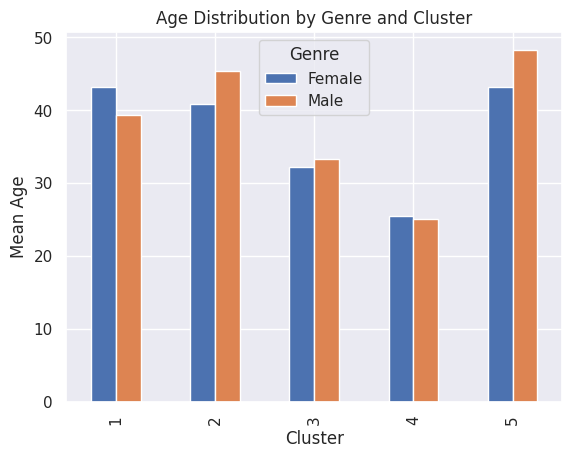

In [ ]:
# Plot the age distribution for each genre within each cluster
age_distribution.plot(kind='bar', stacked=False)
plt.xlabel('Cluster')
plt.ylabel('Mean Age')
plt.title('Age Distribution by Genre and Cluster')
plt.legend(title='Genre')
plt.show()

### **Genre distribution for each Cluster**

In [ ]:
# Group the data by Cluster and Genre, and calculate the genre distribution using count
genre_distribution = df.groupby(['Cluster','Genre'])['Genre'].count().unstack()
genre_distribution

Genre,Female,Male
Cluster,,
1,16,19
2,48,33
3,21,18
4,13,9
5,14,9


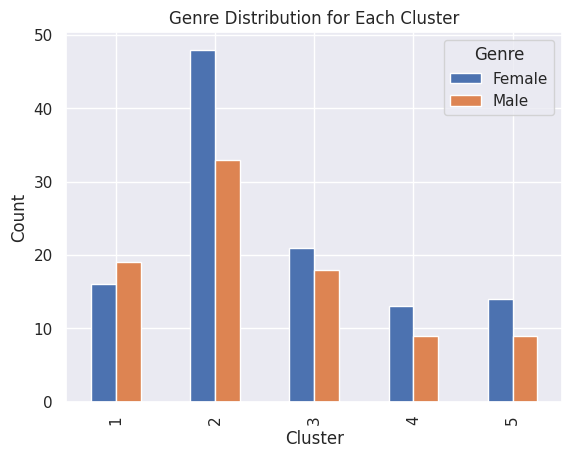

In [ ]:
# Plot the distribution for each genre within each cluster
genre_distribution.plot(kind='bar', stacked=False)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Genre Distribution for Each Cluster')
plt.legend(title='Genre')
plt.show()